In [76]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.reuters.com/companies/THYAO.IS/news'

response = requests.get(url, timeout=10)
url_content = BeautifulSoup(response.content, 'html.parser')

In [88]:
news_divs = url_content.find_all('div', attrs={'class':"item"})

news_heads = []

for i in range(len(news_divs)):
    
    news_heads.append(news_divs[i].a.get_text())
    


In [89]:
import pandas as pd

df = pd.DataFrame(news_heads)

df.columns = ['news']

df.head()

,news
0,Turkish Airlines says reaches compensation dea...
1,"Turkish Airlines, Boeing reach 737 Max aircraf..."
2,Turkish Airlines prepping case against Boeing ...
3,UPDATE 1-Turkish Airlines' quarterly loss more...
4,Exclusive: Istanbul airport consortium does no...


In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

scores = []

for head in news_heads:
    score = vader.polarity_scores(head)
    scores.append(score)

scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaganyesilova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.128},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939},
 {'neg': 0.0, '

In [91]:
df_s = pd.DataFrame(scores)

df_s.head()

,compound,neg,neu,pos
0,0.0516,0.000,0.882,0.118
1,0.0258,0.000,0.879,0.121
2,0.0000,0.000,1.000,0.000
3,-0.3182,0.187,0.813,0.000
4,0.1280,0.000,0.880,0.120


In [92]:
df = df.join(df_s)

df.head()

,news,compound,neg,neu,pos
0,Turkish Airlines says reaches compensation dea...,0.0516,0.000,0.882,0.118
1,"Turkish Airlines, Boeing reach 737 Max aircraf...",0.0258,0.000,0.879,0.121
2,Turkish Airlines prepping case against Boeing ...,0.0000,0.000,1.000,0.000
3,UPDATE 1-Turkish Airlines' quarterly loss more...,-0.3182,0.187,0.813,0.000
4,Exclusive: Istanbul airport consortium does no...,0.1280,0.000,0.880,0.120


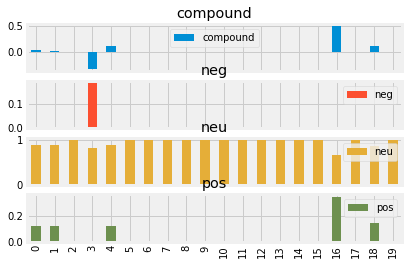

In [93]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

df.plot.bar(subplots=True)

plt.show()

In [85]:
df

,news,compound,neg,neu,pos
0,Turkish Airlines says reaches compensation dea...,0.0516,0.000,0.882,0.118
1,"Turkish Airlines, Boeing reach 737 Max aircraf...",0.0258,0.000,0.879,0.121
2,Turkish Airlines prepping case against Boeing ...,0.0000,0.000,1.000,0.000
3,UPDATE 1-Turkish Airlines' quarterly loss more...,-0.3182,0.187,0.813,0.000
4,Exclusive: Istanbul airport consortium does no...,0.1280,0.000,0.880,0.120
5,Lviv airport in Ukraine delays flights due to ...,0.0000,0.000,1.000,0.000
6,"Turkish airline, telecoms firm to halt U.S. ad...",0.0000,0.000,1.000,0.000
7,"UPDATE 1-Turkish Airlines eyes airport stake, ...",0.0000,0.000,1.000,0.000
8,Turkish Airlines in talks to finance facilitie...,0.0000,0.000,1.000,0.000
9,Turkish Airlines in talks to finance facilitie...,0.0000,0.000,1.000,0.000
